# Clustering con uso de librerías. Datos 2

Proyecto 4. Clustering

- Flores Tun, Jorge David;
- Sánchez Soberanis, Felipe

## Base de datos: Geo-Magnetic field and WLAN dataset for indoor localisation

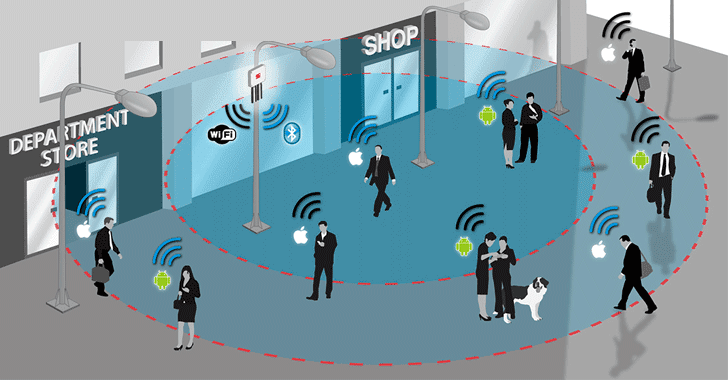

Esta base de datos multivaribale contiene información de localización en interiores, es decir, la ubicación de personas y objetos en un punto de una habitación cerrada, como parte del entrenamiento de sensores y dispositivos de monitoreo en sistemas de dómotica y en el paradigma de entornos inteligentes.

La base de datos de extrajo de [este enlace.](https://data.world/uci/geo-magnetic-field-and-wlan-dataset-for-indoor-localisation)

Esta información se obtuvo de interconexiones entre dispositivos wifi y seonsres de respuesta geomagnética, como parte de una comparativa entre dos dispositivos detectores.

Para este ejercicios por agrupamiento/clustering, se usará únicamente una base, del sensor 1.


A continuación se presentan los métodos y el procesamiento de datos finales.

## Librerías

In [1]:

#---------------Herramientas matemáticas importantes-------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#-------Herramientas de SKLearn: agrupamiento kmeans y puntaje de silueta----
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#---------Preprocesamiento de datos usando el escalamiento estándar----------
from sklearn.preprocessing import StandardScaler

#----------Presentación de datos de salida en susitución del print-----------
import logging

logging.basicConfig(level=logging.INFO)
logging.disable()

## Funciones y métodos

### Función de optimización de agrupamiento usando los métodos del codo y silueta en paralelo

In [2]:
def optimalClusters(
        data,
        max_Clusters: int,
        init_mode   = 'k-means++',
        nInit       = 'auto',
        randomState = 45,
        max_iter    = 50,):
    
    distortion_elbow, distortion_silhouette = [], []
    
    for i in range(2, max_Clusters + 1):
        test_model = KMeans(
            n_clusters          = i,
            init                = init_mode,
            n_init              = nInit,
            random_state        = randomState,
            max_iter            = max_iter,
        )
        test_model.fit(data)
    
        #Elbow method
        distortion_elbow.append(test_model.inertia_)
    
        #Silhouette method
        labels1 = test_model.fit_predict(data)
        sil_avg = silhouette_score(data, labels1)
        distortion_silhouette.append(sil_avg)
    
    return distortion_elbow, distortion_silhouette

### Función de comparación visual de los métodos del codo y silueta usando matplotlib

In [3]:
def elbow_and_silhouette_visual_comparison(
        distortion_elbow_list           : list[float], 
        distortion_silhouette_list      : list[float],
        elbow_Color                     = '#385187',
        silhouette_Color                = '#027A7B',
        fig_size                        = (11, 6),):
    
    #--------------- Some variables -------------------
    iterations = np.array(distortion_elbow_list).shape[0] + 2
    
        
    fig, ax1 = plt.subplots(figsize = fig_size)
    ax1.set_title('Elbow Method and Silhouette Method Compasison', size = 20, pad = 10)

    #--------------- WCSS / Distorsion -----------------
    ax1.plot(
        range(2, iterations), 
        distortion_elbow_list, 
        linestyle = '--', 
        linewidth = 1.5, 
        marker = 'P', 
        markersize = 10, 
        color = elbow_Color, 
        label = 'The Elbow Method',)
    
    #----------- optimal number of clusters -----------------
    ax1.set_xlabel( 'Number of clusters', size = 15 )
    ax1.set_ylabel('WCSS', size = 15 )
    ax1.tick_params( axis = 'x', labelsize = 12 )
    ax1.tick_params( axis = 'y', labelsize = 12 )

    plt.legend(loc='upper center', prop = {'size':12})
    
    # ------------- silhoutte coeff -------------
    ax2 = ax1.twinx()
    ax2.plot(
        range(2, iterations), 
        distortion_silhouette_list,
        linestyle = ':', linewidth = 1.5,
        marker = 'o', markersize = 10,
        color = silhouette_Color ,
        label = 'The Silhouette Method',)

    ax2.set_ylabel('\nSilhoutte Coefficent', size = 15)
    ax2.tick_params(axis = 'y', labelsize = 12)
    plt.legend(loc=0, prop = {'size':12})

    ax1.grid(linestyle = 'dashed', alpha = 0.5)
    
    plt.show()

### Modelo final de agrupamiento/clustering

In [4]:
def labels_KMeans(
    data, 
    n_cluster   : int, 
    init_mode   = 'k-means++', 
    n_init      = 'auto', 
    randomState = 45, 
    max_iter    = 50,):
    
    kmeans_model_Final = KMeans(
            n_clusters          = n_cluster,
            init                = init_mode,
            n_init              = n_init,
            random_state        = randomState,
            max_iter            = max_iter,
        )
    kmeans_model_Final.fit(data)
    labels = kmeans_model_Final.predict(data)
    centroid = kmeans_model_Final.cluster_centers_
    
    
    return labels, centroid

## Datos 2 Geo-Magnetic field and WLAN dataset for indoor localisation

Información relevante de las variables/columnas:

- Timestamp: Número de identificación del dato obtenido. No es necesario incluir como parte de la entrada del modelo.

- Aceleration (X, Y, Z) la aceleración detectada

- Magneticfield (X, Y, Z) es el camo magnético detectado como consecuencia del movimiento de los dispositivos analizados

- AxisAngle (X, Y, Z) es el ángulo de giro detectado por el giroscopio del sensor

- GyroX(Y, Z) Un valor booleano.

Dentro de la fuente de información no se tiene explicado las unidades, por lo que se asumirán como unitarias.

In [5]:
loc_df = pd.read_csv('data/measure1_smartphone_sens.csv')
loc_df.head()

,timestamp,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,1422629483421,-3.577,2.104,9.078,-5.4,-17.9,-28.2,126.404,-12.169,-21.001,0,0,0
1,1422629483520,-3.424,2.927,9.374,-4.3,-21.9,-26.9,134.694,-11.322,-25.898,0,0,0
2,1422629483620,-2.505,2.908,8.867,-0.7,-24.4,-26.5,150.906,-17.523,-15.017,0,0,0
3,1422629483723,-5.473,1.472,9.394,0.3,-25.7,-26.9,138.022,-21.068,-23.941,0,0,0
4,1422629483822,-3.414,2.018,8.187,3.7,-29.6,-23.9,163.519,-12.814,-22.046,0,0,0


In [6]:
timestamps_DF = loc_df['timestamp']
timestamps_DF

0        1422629483421
1        1422629483520
2        1422629483620
3        1422629483723
4        1422629483822
             ...      
18349    1423127642985
18350    1423127643083
18351    1423127643184
18352    1423127643283
18353    1423127643384
Name: timestamp, Length: 18354, dtype: int64

In [7]:
loc_df = loc_df.drop(columns=['timestamp'])

In [8]:
columns1 = np.array(loc_df.columns).tolist()

In [9]:
loc_df.describe()

,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
count,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.000000,18354.0,18354.0,18354.0
mean,-0.296746,4.211019,8.288839,-1.157590,-7.415054,-29.640253,168.779099,-25.079180,-1.687723,0.0,0.0,0.0
std,1.172366,2.326193,1.587541,16.907053,21.466757,11.524140,114.797401,20.257369,7.512564,0.0,0.0,0.0
min,-11.563000,-14.702000,-3.285000,-85.900000,-103.300000,-59.800000,0.005000,-114.158000,-79.969000,0.0,0.0,0.0
25%,-0.675000,3.196000,7.919000,-15.400000,-27.000000,-38.100000,46.692750,-35.234000,-3.859000,0.0,0.0,0.0
50%,-0.331000,4.057000,8.513000,-7.800000,-5.500000,-31.600000,143.816000,-25.197000,-1.936000,0.0,0.0,0.0
75%,0.014000,5.724000,8.991000,16.100000,9.300000,-23.300000,307.210250,-19.470000,0.071000,0.0,0.0,0.0
max,14.914000,12.781000,14.747000,37.900000,53.100000,37.200000,359.989000,158.389000,80.325000,0.0,0.0,0.0


Se procede a preprocesar los datos escalando y normalizando los valores mediante `StandardScaler()`

In [10]:
scaler1 = StandardScaler()
scaler1.fit(loc_df)

loc_standardized = scaler1.transform(loc_df)

In [11]:
loc_df_standardized = pd.DataFrame(data = loc_standardized, columns = columns1)
loc_df_standardized.head()

,AccelerationX,AccelerationY,AccelerationZ,MagneticFieldX,MagneticFieldY,MagneticFieldZ,Z-AxisAgle(Azimuth),X-AxisAngle(Pitch),Y-AxisAngle(Roll),GyroX,GyroY,GyroZ
0,-2.798055,-0.905805,0.497110,-0.250932,-0.488440,0.124980,-0.369139,0.637325,-2.570867,0.0,0.0,0.0
1,-2.667546,-0.551998,0.683567,-0.185869,-0.674780,0.237790,-0.296923,0.679138,-3.222726,0.0,0.0,0.0
2,-1.883640,-0.560166,0.364196,0.027066,-0.791242,0.272501,-0.155697,0.373019,-1.774313,0.0,0.0,0.0
3,-4.415342,-1.177501,0.696165,0.086214,-0.851803,0.237790,-0.267932,0.198016,-2.962222,0.0,0.0,0.0
4,-2.659016,-0.942776,-0.064151,0.287319,-1.033484,0.498120,-0.045822,0.605484,-2.709971,0.0,0.0,0.0


### Prepocesamiento y optimización de agrupamientos

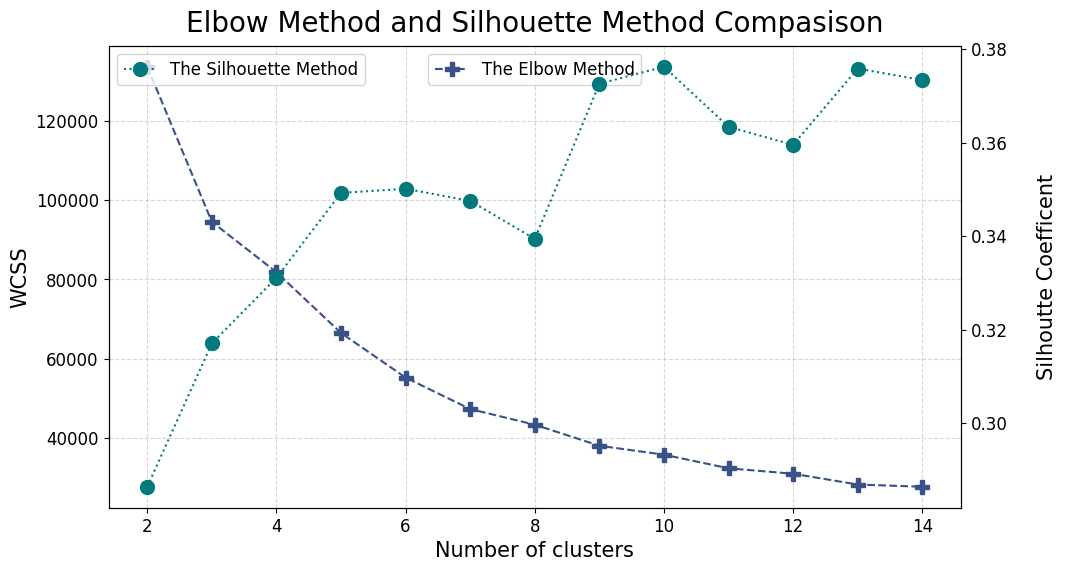

In [12]:
elbow_List, silhouette_List = optimalClusters(loc_standardized, max_Clusters=14)
elbow_and_silhouette_visual_comparison(elbow_List, silhouette_List)

Desde la perspectiva del método del codo, se puede elegir entre 7 y 8 agrupamiento para el modelo final, y contemplando el coeficiente de silueta como 7, también se puede optar por ese valor.

Como, al final, los valores más optimos de la reducción de error se cotempla en los 7 agrupamientos, se toma `clusters = 8`

In [14]:
clusters = 8
loc_lablels, centers = labels_KMeans(loc_standardized, n_cluster = clusters)

Se representan los resultados en un mapa de puntos tipo scatter en `matplotlib` tomando como datos la aceleración

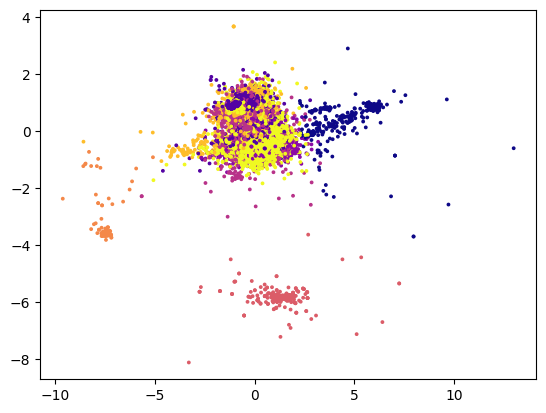

In [16]:
plt.scatter(loc_standardized[:, 0], loc_standardized[:, 1], c = loc_lablels, s = 3, cmap = 'plasma')